In this project, I will be performing an unsupervised clustering of data on the customer's records from a groceries firm's 
database. Customer segmentation is the practice of separating customers into groups that reflect similarities among customers 
in each cluster. I will divide customers into segments to optimize the significance of each customer to the business. 
To modify products according to distinct needs and behaviours of the customers. 
It also helps the business to cater to the concerns of different types of customers.

In [6]:
#Info about dataset columns:
Year_Birth  :Customer's birth year         
Education   :Education Qualification of customer         
Marital_Status  :Marital Status of customer     
Income     :Customer's yearly household income          
Kidhome    :Number of children in customer's household           
Teenhome   :Number of teenagers in customer's househol         
Dt_Customer:Date of customer's enrollment with the company          
Recency  :Number of days since customer's last purchase            
MntWines :Amount spent on wine          
MntFruits   :Amount spent on fruits        
MntMeatProducts    :Amount spent on meat  
MntFishProducts   :Amount spent on fish   
MntSweetProducts  :Amount spent on sweet   
MntGoldProds      :Amount spent on gold  
NumDealsPurchases  :no of purchases through deals,promotion 
NumWebPurchases      :no of purchase through web 
NumCatalogPurchases :no of purchase through catalogue
NumStorePurchases     :no of purchase through store 
NumWebVisitsMonth    :no of times web =site visited
AcceptedCmp3  :1 if customer accepted the offer in the 3rd campaign, 0 otherwise        
AcceptedCmp4   :1 if customer accepted the offer in the 4th campaign, 0 otherwise        
AcceptedCmp5   :1 if customer accepted the offer in the 5th campaign, 0 otherwise          
AcceptedCmp1    :1 if customer accepted the offer in the 1st campaign, 0 otherwise       
AcceptedCmp2    :1 if customer accepted the offer in the 2nd campaign, 0 otherwise     
Complain        :customer no of complains      
Z_CostContact        
Z_Revenue             
Response   :promotion   

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [4]:
#Loding the data
df =pd.read_csv('marketing_campaign.csv',sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [8]:
#Data cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

From the above output, we can conclude and note that:

There are missing values in income
Dt_Customer that indicates the date a customer joined the database is not parsed as DateTime
There are some categorical features in our data frame; as there are some features in dtype: object). 
So we will need to encode them into numeric forms later.

In [9]:
#since there are few misssing values so we can drop it
df = df.dropna()
print("The length after dropping columns are:")
len(df)

The length after dropping columns are:


2216

In [10]:
#converting the date into date type
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-nul

In [13]:
df['Dt_Customer'].max() #last enrolled customer

Timestamp('2014-12-06 00:00:00')

In [15]:
df['Dt_Customer'].min() #oldest enrolled customer

Timestamp('2012-01-08 00:00:00')

In [17]:
dates = []
for i in df["Dt_Customer"]:
    i = i.date()
    dates.append(i) 
dates

[datetime.date(2012, 4, 9),
 datetime.date(2014, 8, 3),
 datetime.date(2013, 8, 21),
 datetime.date(2014, 10, 2),
 datetime.date(2014, 1, 19),
 datetime.date(2013, 9, 9),
 datetime.date(2012, 11, 13),
 datetime.date(2013, 8, 5),
 datetime.date(2013, 6, 6),
 datetime.date(2014, 3, 13),
 datetime.date(2012, 11, 13),
 datetime.date(2013, 11, 15),
 datetime.date(2013, 11, 15),
 datetime.date(2012, 10, 10),
 datetime.date(2012, 11, 24),
 datetime.date(2012, 12, 24),
 datetime.date(2012, 8, 31),
 datetime.date(2013, 3, 28),
 datetime.date(2012, 3, 11),
 datetime.date(2012, 8, 8),
 datetime.date(2013, 6, 1),
 datetime.date(2012, 12, 23),
 datetime.date(2014, 11, 1),
 datetime.date(2013, 3, 18),
 datetime.date(2013, 2, 1),
 datetime.date(2013, 5, 27),
 datetime.date(2013, 5, 31),
 datetime.date(2013, 11, 22),
 datetime.date(2014, 5, 22),
 datetime.date(2013, 11, 5),
 datetime.date(2012, 10, 10),
 datetime.date(2012, 10, 29),
 datetime.date(2013, 2, 20),
 datetime.date(2013, 8, 29),
 datetime.d

In [18]:
#create a new feature customer_for of the no of days customer started to shop in the store
#Created a feature "Customer_For"
days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta)
df["Customer_For"] = days
df["Customer_For"] = pd.to_numeric(df["Customer_For"], errors="coerce")

In [19]:
df['Customer_For']

0       83894400000000000
1       10800000000000000
2       40780800000000000
3        5616000000000000
4       27734400000000000
              ...        
2235    46742400000000000
2236     5270400000000000
2237    27216000000000000
2238    27302400000000000
2239    67564800000000000
Name: Customer_For, Length: 2216, dtype: int64

In [36]:
#exploring the categorical features
print("Total categories in the feature Marital_Status:\n", df["Marital_Status"].value_counts(), "\n")
print("Total categories in the feature Education:\n", df["Education"].value_counts())

Total categories in the feature Marital_Status:
 Married     857
Together    571
Single      470
Divorced    231
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 

Total categories in the feature Education:
 Graduate         1115
Postgraduate      845
Undergraduate     252
Name: Education, dtype: int64


# Feature Engineering

In the next bit, I will be performing the following steps to engineer some new features:

Extract the "Age" of a customer by the "Year_Birth" indicating the birth year of the respective person.
Create another feature "Spent" indicating the total amount spent by the customer in various categories over the span of two years.
Create another feature "Living_With" out of "Marital_Status" to extract the living situation of couples.
Create a feature "Children" to indicate total children in a household that is, kids and teenagers.
To get further clarity of household, Creating feature indicating "Family_Size"
Create a feature "Is_Parent" to indicate parenthood status
Lastly, I will create three categories in the "Education" by simplifying its value counts.
Dropping some of the redundant features

In [22]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Customer_For'],
      dtype='object')

In [24]:
#Feature Engineering
#Age of customer today 
df["Age"] = 2021-df["Year_Birth"]

#Total spendings on various items
df["Spent"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]

#Deriving living situation by marital status"Alone"
df["Living_With"]=df["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

#Feature indicating total children living in the household
df["Children"]=df["Kidhome"]+df["Teenhome"]

#Feature for total members in the householde
df["Family_Size"] = df["Living_With"].replace({"Alone": 1, "Partner":2})+ df["Children"]

#Feature pertaining parenthood
df["Is_Parent"] = np.where(df.Children> 0, 1, 0)

#Segmenting education levels in three groups
df["Education"]=df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#For clarity
df=df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
new_df = df.drop(to_drop, axis=1)

In [26]:
new_df.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2.216000e+03,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.064079,0.013538,0.009477,0.150271,4.423735e+16,52.179603,607.075361,0.947202,2.592509,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.244950,0.115588,0.096907,0.357417,2.008532e+16,11.985554,602.900476,0.749062,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,25.000000,5.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,2.937600e+16,44.000000,69.000000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,4.432320e+16,51.000000,396.500000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,5.927040e+16,62.000000,1048.000000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,9.184320e+16,128.000000,2525.000000,3.000000,5.000000,1.000000


The above stats show some discrepancies in mean Income and Age and max Income and age.

Do note that max-age is 128 years, As I calculated the age that would be today (i.e. 2021) and the data is old.

I must take a look at the broader view of the data. I will plot some of the selected features.

Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 432x288 with 0 Axes>

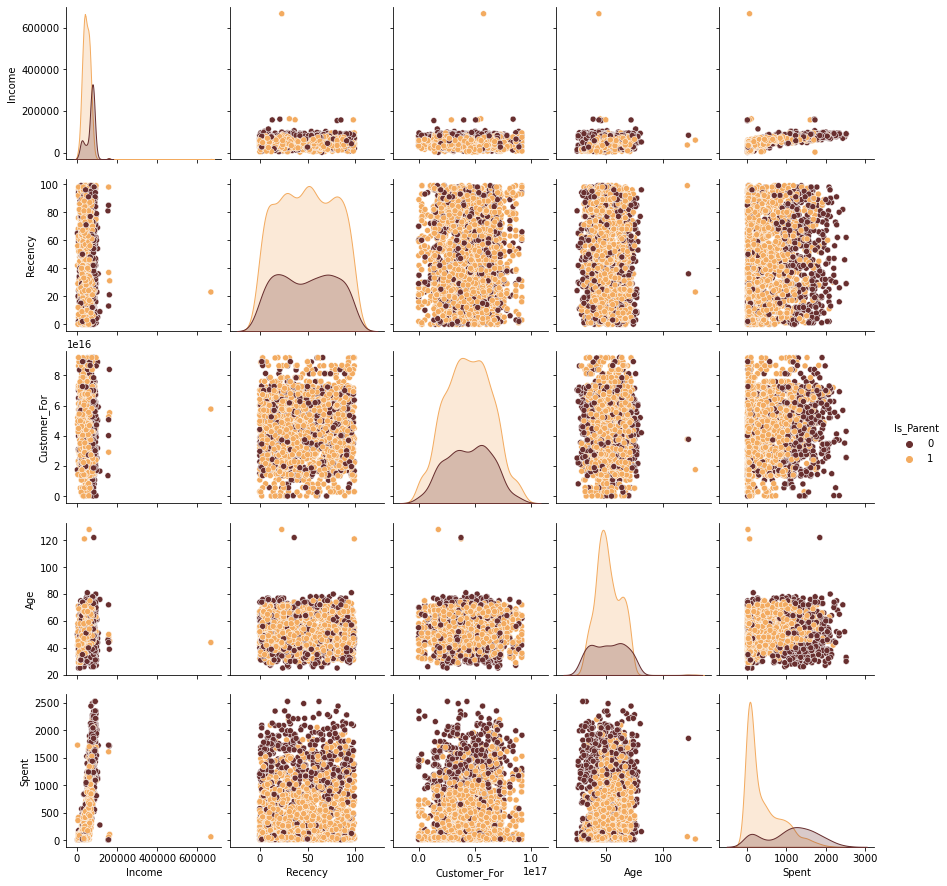

In [32]:
#Plotting following features
To_Plot = [ "Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(new_df[To_Plot], hue= "Is_Parent",palette= (["#682F2F","#F3AB60"]))
#Taking hue 
plt.show()

Clearly, there are a few outliers in the Income and Age features. I will be deleting the outliers in the data.

In [34]:
#Dropping the outliers by setting a cap on Age and income. 
new_df = new_df[(new_df["Age"]<90)]
new_df = new_df[(new_df["Income"]<600000)]
print("The total number of data-points after removing the outliers are:", len(new_df))

The total number of data-points after removing the outliers are: 2212


<AxesSubplot:>

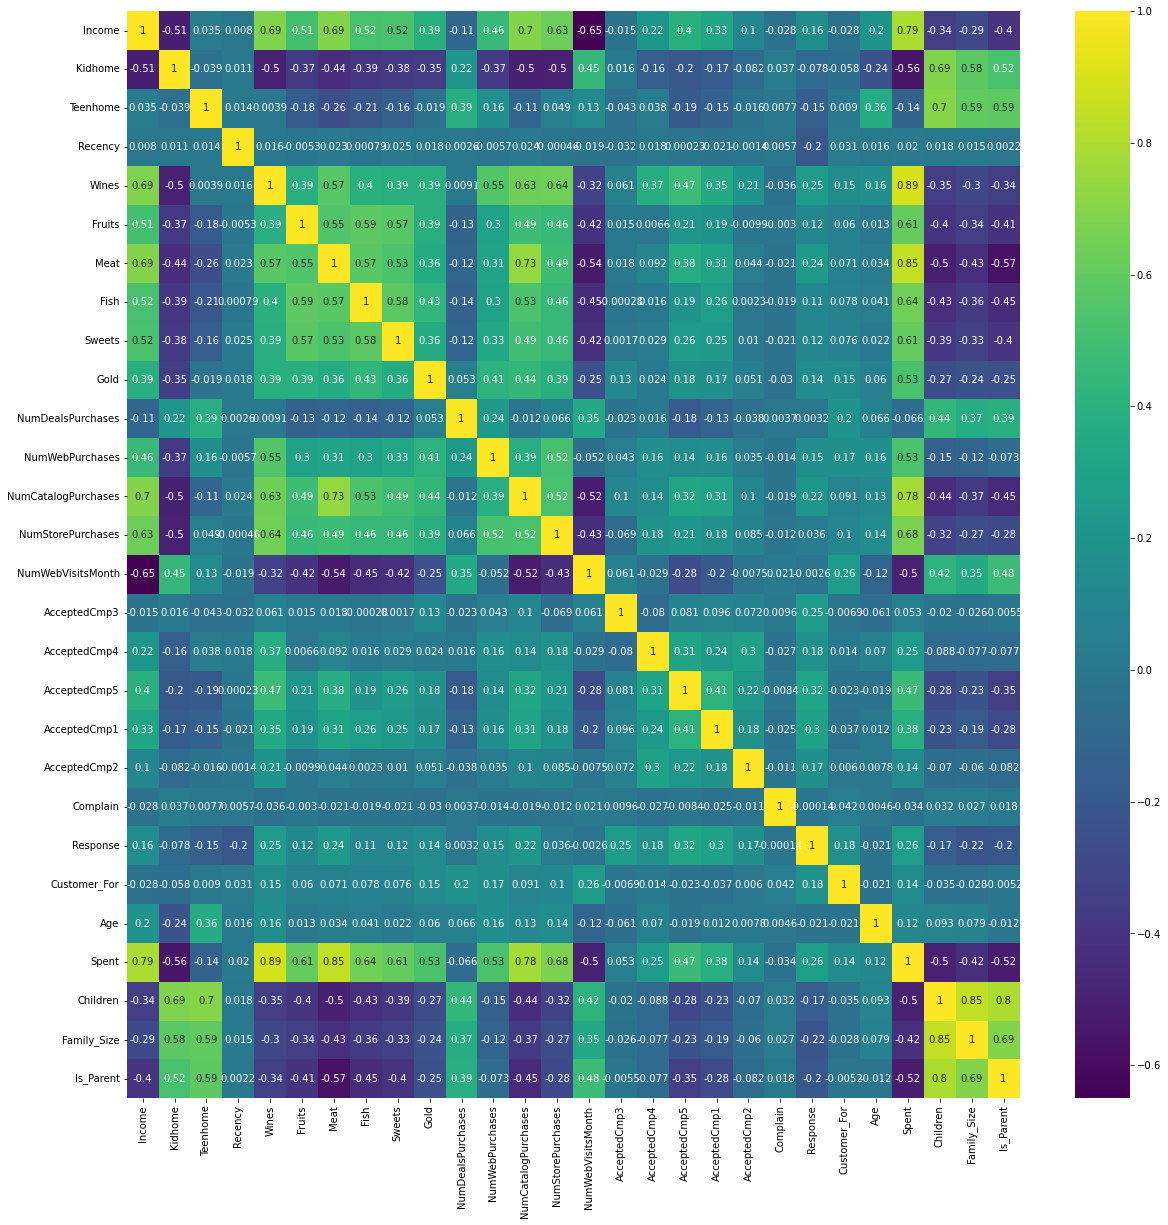

In [35]:
#correlation matrix
corrmat= new_df.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat,annot=True, cmap='viridis')

# DAta Preprocessing

The data is quite clean and the new features have been included. I will proceed to the next step. That is, preprocessing the data.


DATA PREPROCESSING

In this section, I will be preprocessing the data to perform clustering operations.

The following steps are applied to preprocess the data:

Label encoding the categorical features
Scaling the features using the standard scaler
Creating a subset dataframe for dimensionality reduction

In [37]:
s = (new_df.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Living_With']


In [39]:
#Label Encoding the object dtypes.
LE=LabelEncoder()
for i in object_cols:
    new_df[i]=new_df[[i]].apply(LE.fit_transform)
    
print("All features are now numerical")

All features are now numerical


In [40]:
#Creating a copy of data
ds = new_df.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)
#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

All features are now scaled


In [50]:
#Scaled data to be used for reducing the dimensionality
print("Dataframe to be used for further modelling:")
scaled_ds.head()

Dataframe to be used for further modelling:


,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,-0.893586,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,...,2.503607,-0.555814,0.692181,1.973583,1.018352,1.676245,-1.349603,-1.264598,-1.758359,-1.581139
1,-0.893586,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,...,-0.571340,-1.171160,-0.132545,-1.665144,1.274785,-0.963297,-1.349603,1.404572,0.449070,0.632456
2,-0.893586,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,...,-0.229679,1.290224,-0.544908,-0.172664,0.334530,0.280110,0.740959,-1.264598,-0.654644,-1.581139
3,-0.893586,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,...,-0.913000,-0.555814,0.279818,-1.923210,-1.289547,-0.920135,0.740959,0.069987,0.449070,0.632456
4,0.571657,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,...,0.111982,0.059532,-0.132545,-0.822130,-1.033114,-0.307562,0.740959,0.069987,0.449070,0.632456


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2212 non-null   int64         
 1   Year_Birth           2212 non-null   int64         
 2   Education            2212 non-null   object        
 3   Marital_Status       2212 non-null   object        
 4   Income               2212 non-null   float64       
 5   Kidhome              2212 non-null   int64         
 6   Teenhome             2212 non-null   int64         
 7   Dt_Customer          2212 non-null   datetime64[ns]
 8   Recency              2212 non-null   int64         
 9   Wines                2212 non-null   int64         
 10  Fruits               2212 non-null   int64         
 11  Meat                 2212 non-null   int64         
 12  Fish                 2212 non-null   int64         
 13  Sweets               2212 non-nul

DIMENSIONALITY REDUCTION

In this problem, there are many factors on the basis of which the final classification will be done. These factors are basically attributes or features. The higher the number of features, the harder it is to work with it. Many of these features are correlated, and hence redundant. This is why I will be performing dimensionality reduction on the selected features before putting them through a classifier.
Dimensionality reduction is the process of reducing the number of random variables under consideration, by obtaining a set of principal variables.

Principal component analysis (PCA) is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss.

# DIMENSIONALITY REDUCTION

In [55]:
pca = PCA(n_components=3)

pca_components= pca.fit_transform(scaled_ds)
columns=['PCA1','PCA2','PCA3']
pca_ds = pd.DataFrame(pca_components,columns=columns)
pca_ds.head()

,PCA1,PCA2,PCA3
0,4.994345,-0.151604,2.635560
1,-2.884457,-0.006869,-1.868612
2,2.617869,-0.720358,-0.247168
3,-2.676037,-1.542049,-0.922313
4,-0.649590,0.209849,-0.023423


In [56]:
pca.explained_variance_ratio_

array([0.36005684, 0.12660793, 0.06489053])

([<matplotlib.axis.XTick at 0x2ea046125e0>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

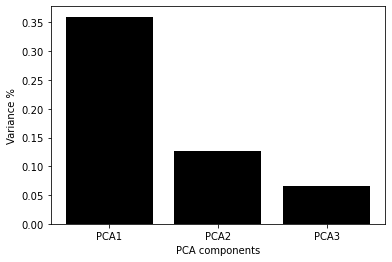

In [59]:
plt.bar(columns,pca.explained_variance_ratio_,color='black')
plt.xlabel('PCA components')
plt.ylabel('Variance %')
plt.xticks(columns)

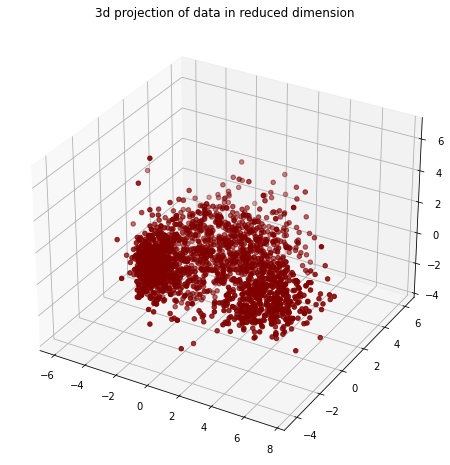

In [63]:
x = pca_ds['PCA1']
y = pca_ds['PCA2']
z= pca_ds['PCA3']

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(x,y,z,c='maroon',marker='o')
ax.set_title("3d projection of data in reduced dimension")
plt.show()

# Clustering

Now that I have reduced the attributes to three dimensions, I will be performing clustering via Agglomerative clustering. Agglomerative clustering is a hierarchical clustering method. It involves merging examples until the desired number of clusters is achieved.

Steps involved in the Clustering

Elbow Method to determine the number of clusters to be formed
Clustering via Agglomerative Clustering
Examining the clusters formed via scatter plot

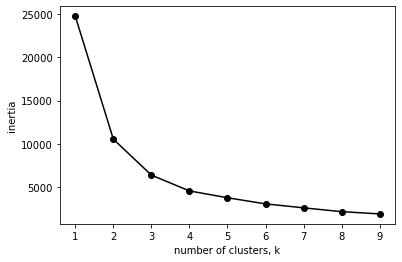

In [64]:
ks = range(1, 10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(pca_ds.iloc[:,:2])
    inertias.append(model.inertia_)

plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

#HEnce the optimal no of cluster id 4. Now building model with 4 clusters

In [65]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(pca_ds)
pca_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= yhat_AC

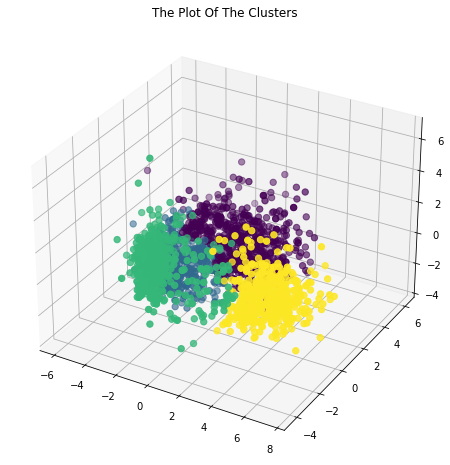

In [67]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=pca_ds["Clusters"], marker='o' )
ax.set_title("The Plot Of The Clusters")
plt.show()

# Evaluating models

Since this is an unsupervised clustering. We do not have a tagged feature to evaluate or score our model. The purpose of this section is to study the patterns in the clusters formed and determine the nature of the clusters' patterns.

For that, we will be having a look at the data in light of clusters via exploratory data analysis and drawing conclusions.

Firstly, let us have a look at the group distribution of clustring

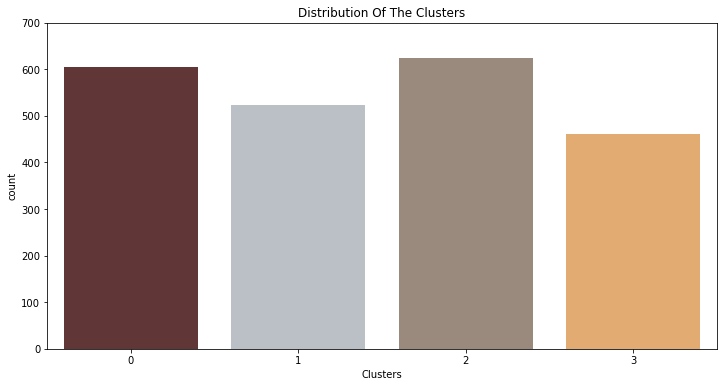

In [70]:
plt.figure(figsize=(12,6))
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=df["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.ylim(0,700)
plt.show()

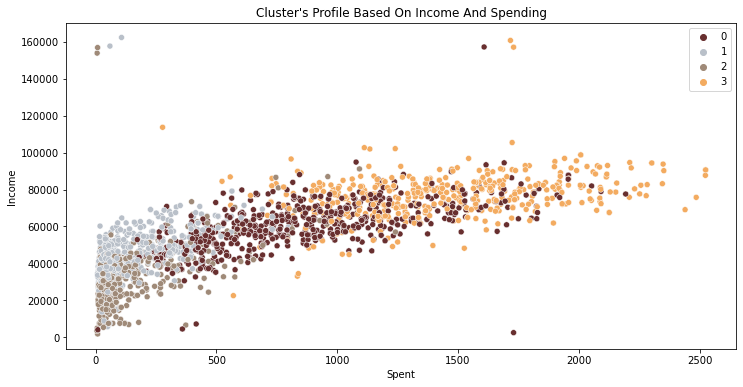

In [72]:
#The clusters seem to be fairly distributed.
plt.figure(figsize=(12,6))
pl = sns.scatterplot(data = df,x=df["Spent"], y=df["Income"],hue=df["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

group 0: high spending & average income
group 1: high spending & low income
group 2: low spending & low income
group 3: high spending & high income

Next, I will be looking at the detailed distribution of clusters as per the various products in the data. 
Namely: Wines, Fruits, Meat, Fish, Sweets and Gold



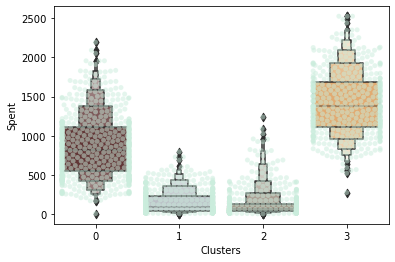

In [73]:
plt.figure()
pl=sns.swarmplot(x=df["Clusters"], y=df["Spent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=df["Clusters"], y=df["Spent"], palette=pal)
plt.show()

In [77]:
#plotting which clusters have acceptrd the highest numeber of promotions
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish',
       'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Customer_For', 'Age', 'Spent', 'Living_With', 'Children',
       'Family_Size', 'Is_Parent', 'Clusters'],
      dtype='object')

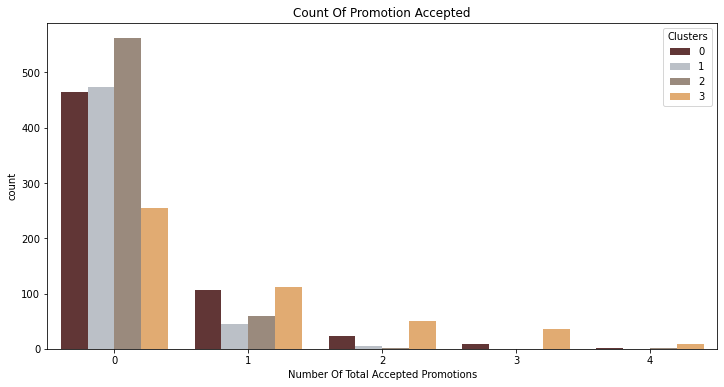

In [79]:
#Creating a feature to get a sum of accepted promotions 
df["Total_Promos"] = df["AcceptedCmp1"]+ df["AcceptedCmp2"]+ df["AcceptedCmp3"]+ df["AcceptedCmp4"]+ df["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure(figsize=(12,6))
pl = sns.countplot(x=df["Total_Promos"],hue=df["Clusters"], palette= pal)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

In [82]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,Response,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent,Clusters,Total_Promos
0,5524,1957,Graduate,Single,58138.0,0,0,2012-04-09,58,635,...,1,83894400000000000,64,1617,Alone,0,1,0,3,0
1,2174,1954,Graduate,Single,46344.0,1,1,2014-08-03,38,11,...,0,10800000000000000,67,27,Alone,2,3,1,1,0
2,4141,1965,Graduate,Together,71613.0,0,0,2013-08-21,26,426,...,0,40780800000000000,56,776,Partner,0,2,0,3,0
3,6182,1984,Graduate,Together,26646.0,1,0,2014-10-02,26,11,...,0,5616000000000000,37,53,Partner,1,3,1,2,0
4,5324,1981,Postgraduate,Married,58293.0,1,0,2014-01-19,94,173,...,0,27734400000000000,40,422,Partner,1,3,1,1,0


In [83]:
df['Total_Promos'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

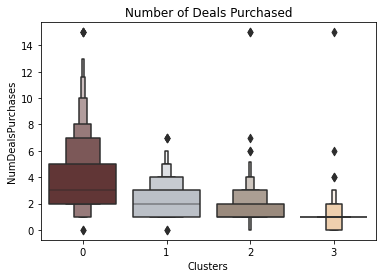

In [84]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=df["NumDealsPurchases"],x=df["Clusters"], palette= pal)
pl.set_title("Number of Deals Purchased")
plt.show()

Unlike campaigns, the deals offered did well. It has best outcome with cluster 0 and cluster 1. 
However, our star customers cluster 1 are not much into the deals. 
Nothing seems to attract cluster 2 overwhelmingly

# Profiling

PROFILING

Now that we have formed the clusters and looked at their purchasing habits. Let us see who all are there in these clusters. 
For that, we will be profiling the clusters formed and 
come to a conclusion about who is our star customer and who needs more attention from the retail store's marketing team.

To decide that I will be plotting some of the features that are indicative of the customer's personal traits in 
light of the cluster they are in. On the basis of the outcomes, I will be arriving at the conclusions.

<Figure size 864x432 with 0 Axes>

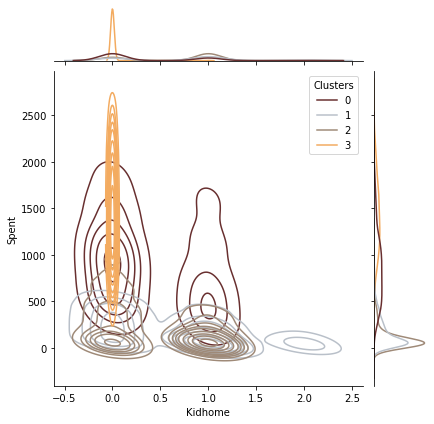

<Figure size 864x432 with 0 Axes>

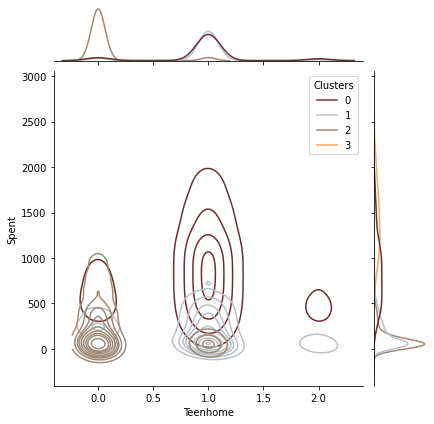

<Figure size 864x432 with 0 Axes>

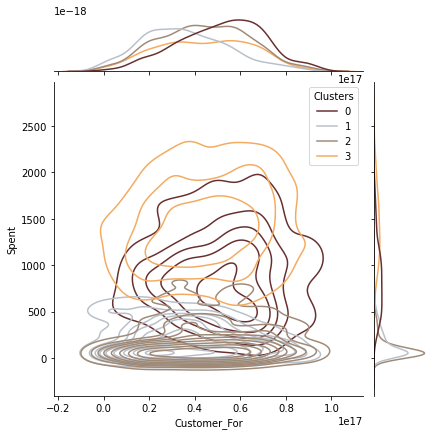

<Figure size 864x432 with 0 Axes>

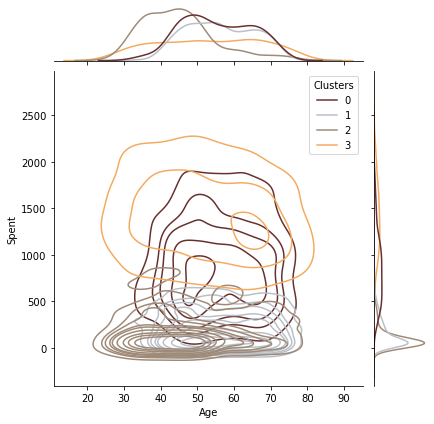

<Figure size 864x432 with 0 Axes>

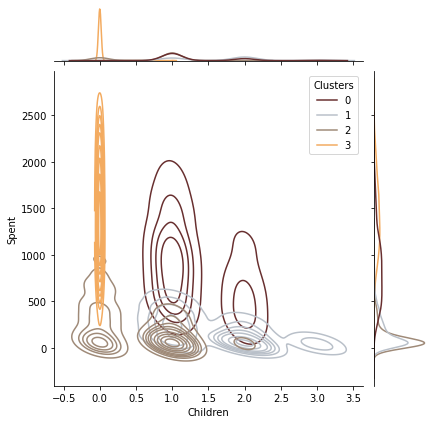

<Figure size 864x432 with 0 Axes>

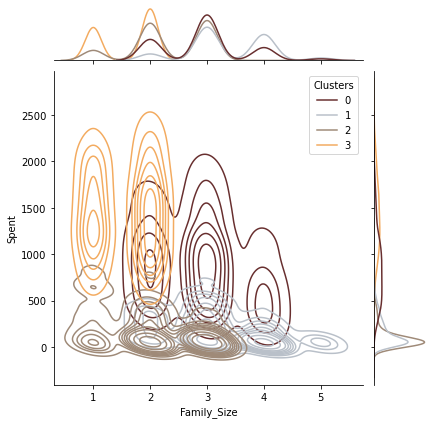

<Figure size 864x432 with 0 Axes>

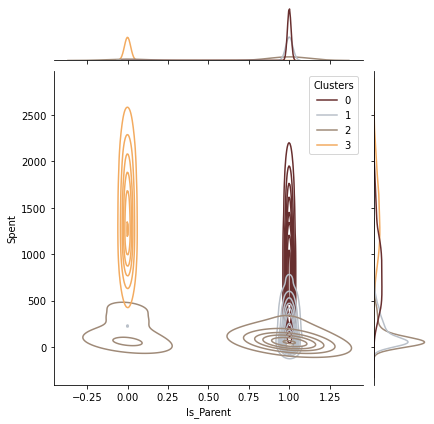

In [87]:
Personal = [ "Kidhome","Teenhome","Customer_For", "Age", "Children", "Family_Size", "Is_Parent"]

for i in Personal:
    plt.figure(figsize=(12,6))
    sns.jointplot(x=df[i], y=df["Spent"], hue =df["Clusters"], kind="kde", palette=pal)
    plt.show()

In [ ]:
CLuster 0:
are definietly  parents
have family size of least at  2 and max 4
most of them have teenager at home
realtively older

In [ ]:
Cluster 1:
are definietly  parents
have family size of least at  2 and max 5
most of them have teenager at home
realtively older

In [ ]:
Cluster 2:
are parents
3 member in family
one Kid

relatively younger    

In [ ]:
Cluster 3:
are not parents
are couple relative to single
all ages people
family size is max 2
